# House Price Prediction

### Data Lit || Homework Assignment || Regression

by Denis Volchugin

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msngo

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from pivottablejs import pivot_ui

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer

sns.set()
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

%matplotlib inline

In [2]:
test = pd.read_csv ('../Data/test.csv')
train = pd.read_csv ('../Data/train.csv')

In [3]:
pd.set_option ('display.max_columns', 500)
pd.set_option ('display.max_rows', 500)

## OK, what do we have here?

In [4]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.000,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.000,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.000,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.000,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.000,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,No

In [5]:
Dscr = train.describe(include='all').T
Dscr

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.000,NaN,NaN,NaN,730.500,421.610,1.000,365.750,730.500,1095.250,1460.000
MSSubClass,1460.000,NaN,NaN,NaN,56.897,42.301,20.000,20.000,50.000,70.000,190.000
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.000,NaN,NaN,NaN,70.050,24.285,21.000,59.000,69.000,80.000,313.000
LotArea,1460.000,NaN,NaN,NaN,10516.828,9981.265,1300.000,7553.500,9478.500,11601.500,215245.000
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It looks like some people sell houses, some people buy houses...
Can we use this info somehow? To tell the truth, the job is not very inspiring, but it has to be done! 
Like Russians say - "once the carriage is grasped, don't say you can't manage it!"

### What kind of cargo can we drop to move faster?

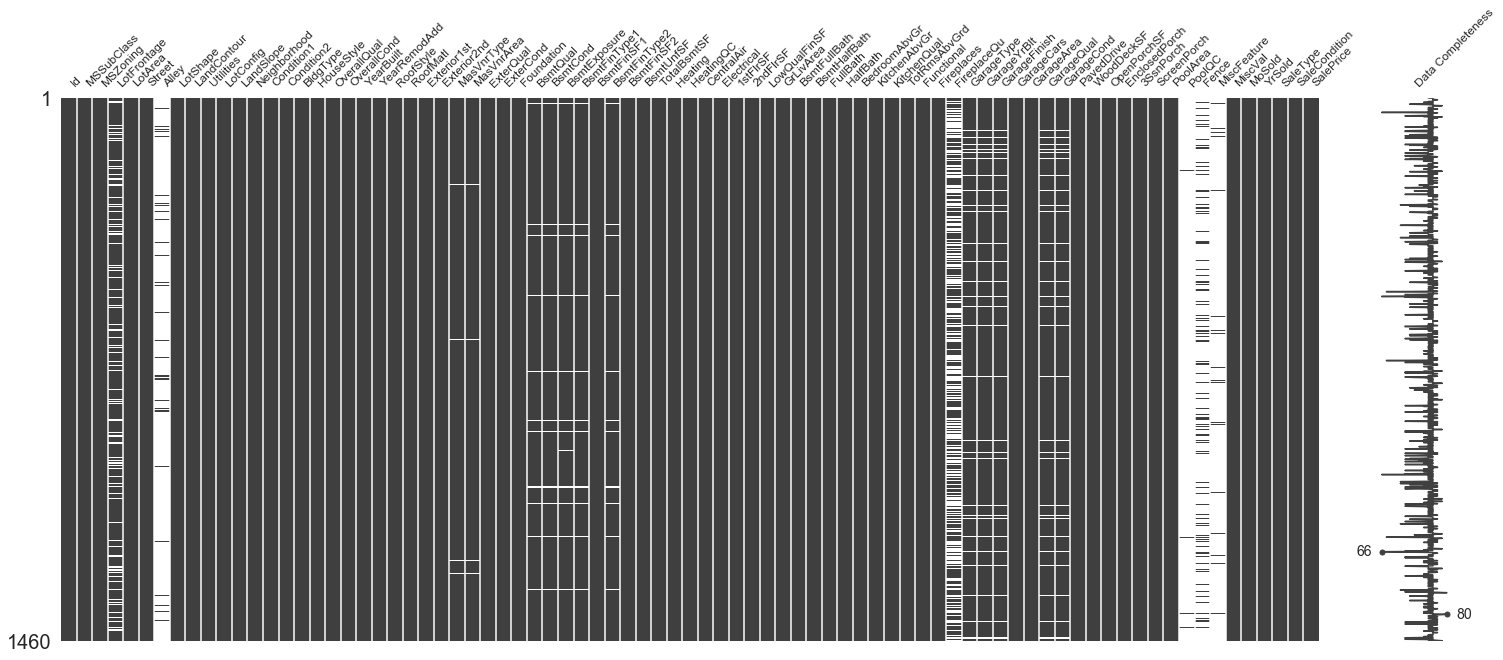

In [6]:
msngo.matrix(train, labels=True, fontsize=12);

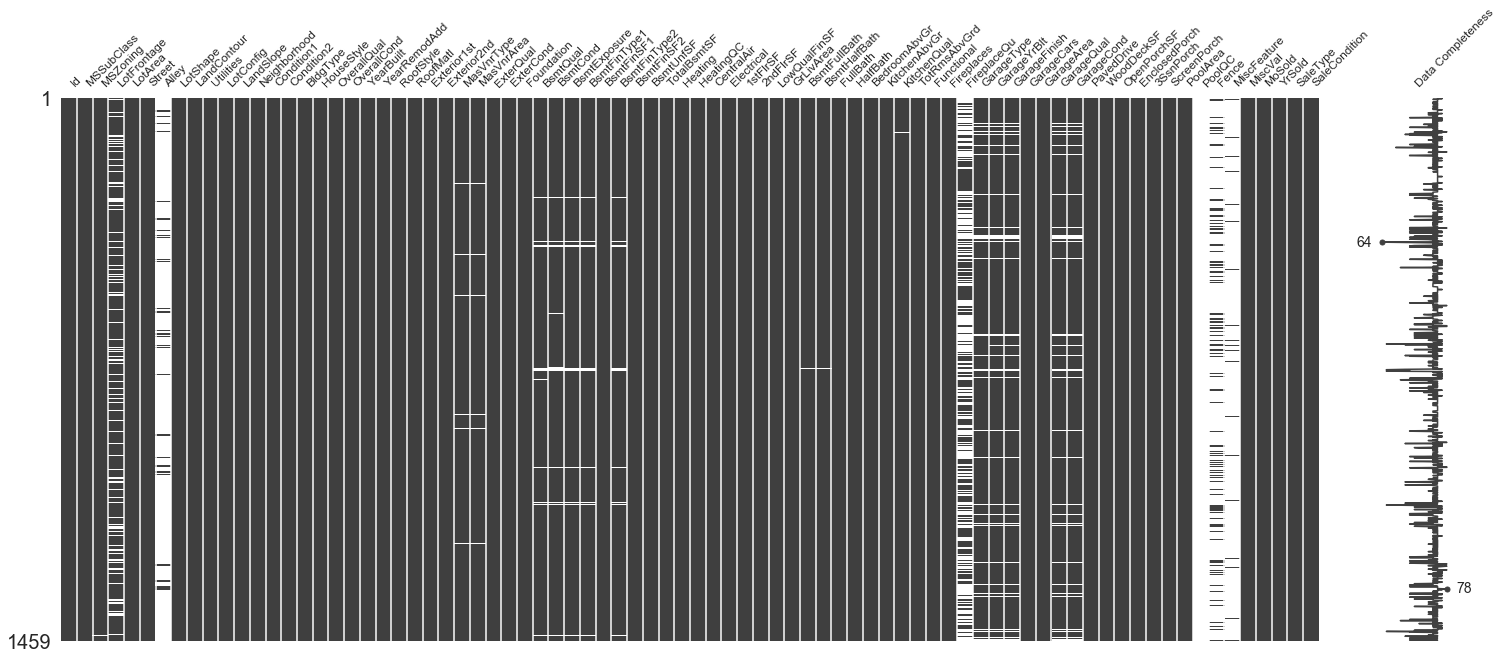

In [7]:
msngo.matrix(test, labels=True, fontsize=12);

two files are pretty similar. some data is missing, but we can live with that. I'll just pretend I don't see that empty columns. But, wait a minute? is there any reason to wait for? I don't think so.

In [8]:
train.drop([
    'LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
    'MiscFeature'
],
           axis=1,
           inplace=True)
test.drop([
    'LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
    'MiscFeature'
],
          axis=1,
          inplace=True)

I've noticed that we've got 2 blocks of info concerning Basement and Garage with a lot of missing values.

In [9]:
train[train['GarageFinish'].isna()][:30]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.000,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,nan,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
48,49,190,RM,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,nan,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,0,6,2009,New,Partial,113000
78,79,90,RL,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.000,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NaN,nan,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,136500
88,89,50,C (all),8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.000,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,nan,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NaN,nan,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,123600
99,100,20,RL,9320,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,None,0.000,TA,TA,CBlock,TA,TA,No,ALQ,569,Unf,0,381,950,GasA,Fa,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,6,Typ,0,NaN,nan,NaN,0,0,NaN,NaN,Y,352,0,0,0,0,0,400,1,2010,WD,Normal,128950
108,109,50,RM,8500,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1919,2005,Gable,CompShg,CemntBd,CmentBd,None,0.000,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,793,793,GasW,TA,N,FuseF,997,520,0,1517,0,0,2,0,3,1,Fa,7,Typ,0,NaN,nan,NaN,0,0,NaN,NaN,N,0,0,144,0,0,0,0,8,2007,WD,Normal,115000
125,126,190,RM,6780,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,30,520,GasA,Gd,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,NaN,nan,NaN,0,0,NaN,NaN,N,53,0,0,0,0,0,0,6,2006,WD,Normal,84500
127,128,45,RM,4388,Pave,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Unf,5,7,1930,1950,Gable,CompShg,WdShing,Wd Sdng,None,0.000,TA,Gd,BrkTil,TA,TA,No,LwQ,116,Unf,0,556,672,GasA,Ex,Y,SBrkr,840,0,0,840,0,0,1,0,3,1,TA,5,Typ,1,NaN,nan,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2007,WD,Normal,87000
140,141,20,RL,10500,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.000,TA,TA,CBlock,TA,TA,No,ALQ,432,Unf,0,432,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,1,NaN,nan,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,ConLI,Normal,115000


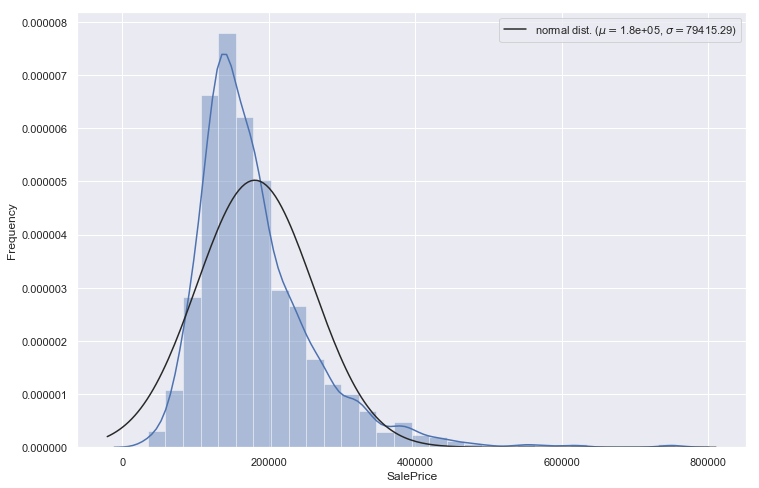

In [10]:
fig, ax = plt.subplots (figsize=(12,8))
sns.distplot(train.SalePrice, fit=stats.norm, bins=30);

#get fit params
mu, sigma = stats.norm.fit(train.SalePrice)

#legend and label
plt.legend(["normal dist. ($\mu=${0:.2g}, $\sigma=${1:.2f})".format(mu, sigma)])
plt.ylabel('Frequency');

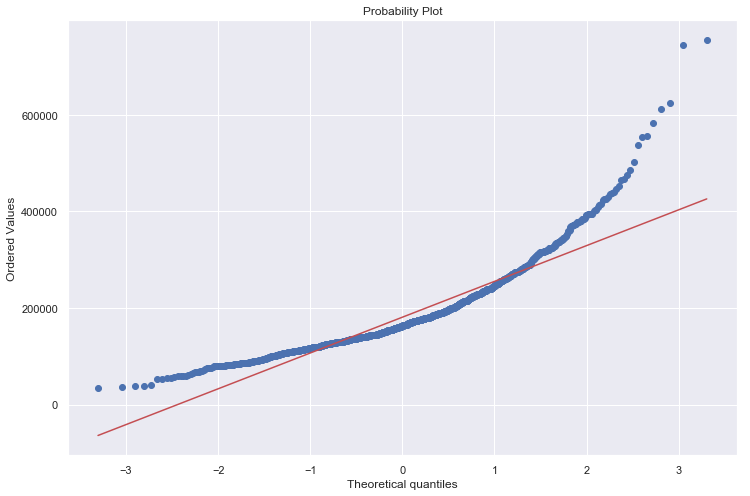

In [11]:
fig, ax = plt.subplots (figsize=(12,8))
res = stats.probplot(train['SalePrice'], plot=plt)

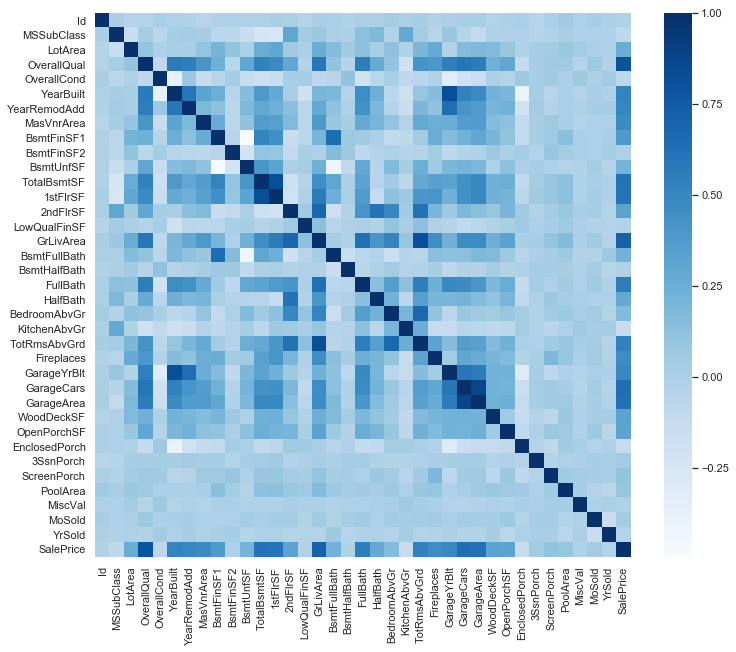

In [12]:
corrmat = train.corr()
fig, ax = plt.subplots (figsize=(12,10))
sns.heatmap (corrmat, cmap='Blues');

In [13]:
corrmat['SalePrice'].sort_values(ascending=False)

SalePrice        1.000
OverallQual      0.791
GrLivArea        0.709
GarageCars       0.640
GarageArea       0.623
TotalBsmtSF      0.614
1stFlrSF         0.606
FullBath         0.561
TotRmsAbvGrd     0.534
YearBuilt        0.523
YearRemodAdd     0.507
GarageYrBlt      0.486
MasVnrArea       0.477
Fireplaces       0.467
BsmtFinSF1       0.386
WoodDeckSF       0.324
2ndFlrSF         0.319
OpenPorchSF      0.316
HalfBath         0.284
LotArea          0.264
BsmtFullBath     0.227
BsmtUnfSF        0.214
BedroomAbvGr     0.168
ScreenPorch      0.111
PoolArea         0.092
MoSold           0.046
3SsnPorch        0.045
BsmtFinSF2      -0.011
BsmtHalfBath    -0.017
MiscVal         -0.021
Id              -0.022
LowQualFinSF    -0.026
YrSold          -0.029
OverallCond     -0.078
MSSubClass      -0.084
EnclosedPorch   -0.129
KitchenAbvGr    -0.136
Name: SalePrice, dtype: float64

In [14]:
# main factors influencing SalePrice:
Sfctr = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
    'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'BsmtHalfBath',
    'LowQualFinSF', 'YrSold', 'OverallCond', 'EnclosedPorch', 'KitchenAbvGr'
]

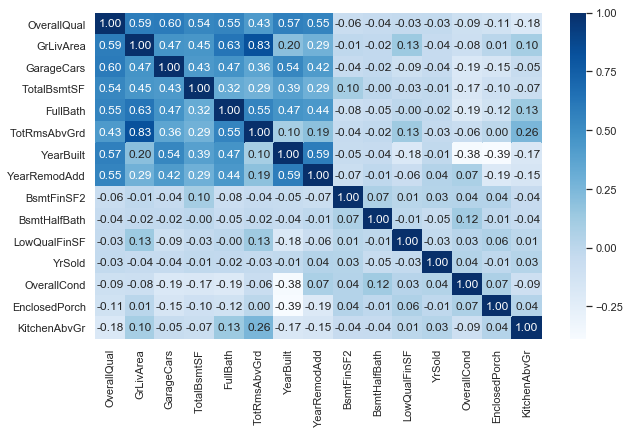

In [15]:
# let's look at them through the OKULAR O_O
fig, ax = plt.subplots (figsize=(10, 6))
cm = np.corrcoef(train[Sfctr].values.T)
sns.set(font_scale=1)
sns.heatmap (cm, cmap='Blues', annot=True, fmt='.2f', yticklabels=Sfctr, xticklabels=Sfctr);

### Remove outliers

In [16]:
# remove outliers (huge living area for a suspiciously low price)
Ctrain = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)].index) # Cleaned train data

In [17]:
# remove outliers (huge basement for a suspiciously low price)
Ctrain = Ctrain.drop(Ctrain[(Ctrain['TotalBsmtSF'] > 6000) & (Ctrain['SalePrice'] < 200000)].index)

## FINALLY REGRESSION

In [18]:
target = Ctrain.SalePrice

In [19]:
#STDtrain = StandardScaler().fit_transform(Ctrain)
#STDtest = StandardScaler().fit_transform(test)

In [20]:
X_train, X_test, y_train, y_test = train_test_split (Ctrain, target, test_size = 0.3, random_state = 0)

### Linear regression

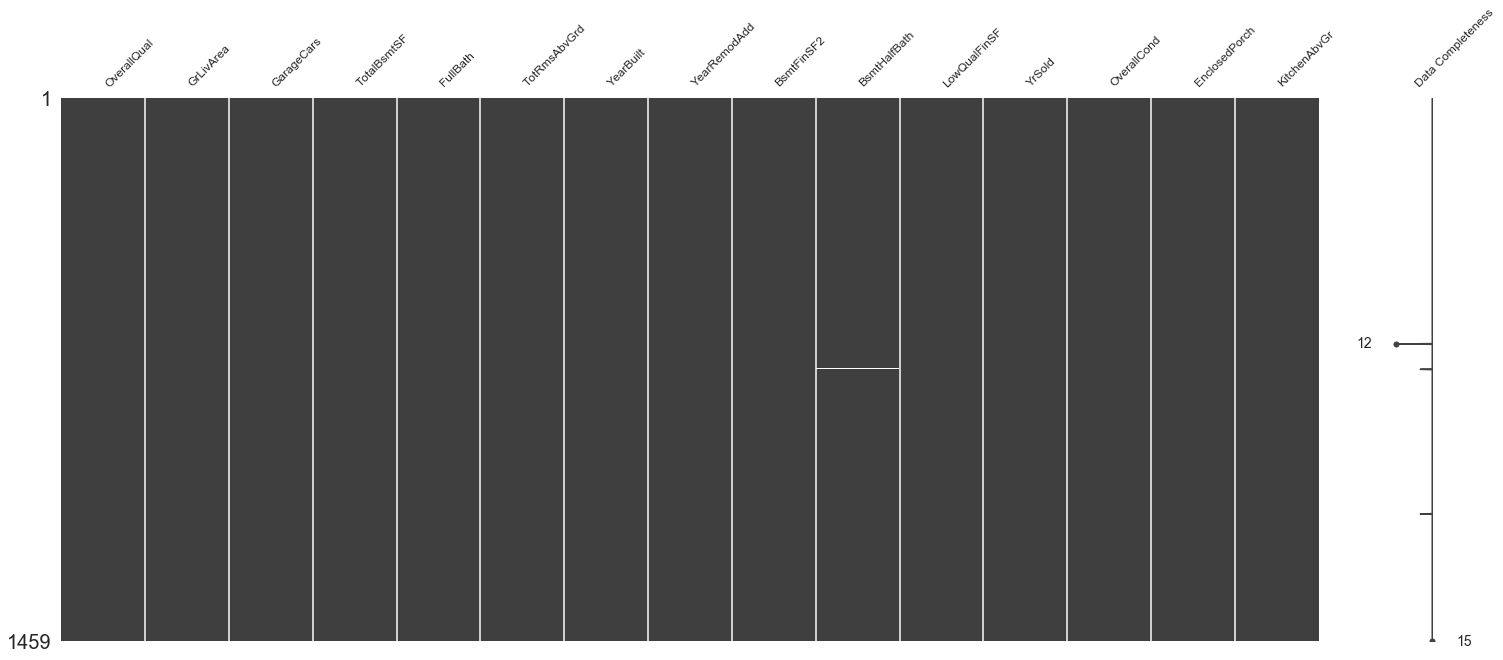

In [21]:
msngo.matrix(test[Sfctr], labels=True, fontsize=12);

In [22]:
test = test.fillna(0)

In [23]:
LinReg = LinearRegression().fit(Ctrain[Sfctr], target)

In [24]:
LinReg_y_predict = LinReg.predict (test[Sfctr])

In [25]:
LR = pd.DataFrame({'LR': LinReg_y_predict})

### Ridge

In [26]:
Ridge = RidgeCV(alphas= [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]).fit (Ctrain[Sfctr], target)

In [27]:
Ridge_y_predict = Ridge.predict (test[Sfctr])

In [28]:
R = pd.DataFrame({'R': Ridge_y_predict})

### Lasso

In [29]:
Lasso = LassoCV(
    alphas=[
        0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1,
        0.3, 0.6, 1
    ],
    max_iter=50000,
    cv=10).fit(Ctrain[Sfctr], target)

In [30]:
Lasso_y_predict = Lasso.predict (test[Sfctr])

In [31]:
LS = pd.DataFrame({'LS': Lasso_y_predict})

### Compare results

In [32]:
Sample = pd.read_csv ('../data/sample_submission.csv')

In [33]:
FinTest = pd.concat ([test, Sample, LR, R, LS], axis=1)

In [34]:
FinTest.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Id,SalePrice,LR,R,LS
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,468.000,LwQ,144.000,270.000,882.000,GasA,TA,Y,SBrkr,896,0,0,896,0.000,0.000,1,0,2,1,TA,5,Typ,0,Attchd,1961.000,Unf,1.000,730.000,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,1461,169277.052,105345.964,105231.672,105345.188
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000,TA,TA,CBlock,TA,TA,No,ALQ,923.000,Unf,0.000,406.000,1329.000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000,0.000,1,1,3,1,Gd,6,Typ,0,Attchd,1958.000,Unf,1.000,312.000,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,1462,187758.394,170883.832,170743.986,170882.447
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,GLQ,791.000,Unf,0.000,137.000,928.000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000,0.000,2,1,3,1,TA,6,Typ,1,Attchd,1997.000,Fin,2.000,482.000,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,1463,183583.684,178750.216,178713.377,178750.940
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000,TA,TA,PConc,TA,TA,No,GLQ,602.000,Unf,0.000,324.000,926.000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000,0.000,2,1,3,1,Gd,7,Typ,1,Attchd,1998.000,Fin,2.000,470.000,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,1464,179317.478,196011.527,195866.226,196011.596
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000,Unf,0.000,1017.000,1280.000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000,0.000,2,0,2,1,Gd,5,Typ,0,Attchd,1992.000,RFn,2.000,506.000,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,1465,150730.080,211072.383,211261.456,211076.012


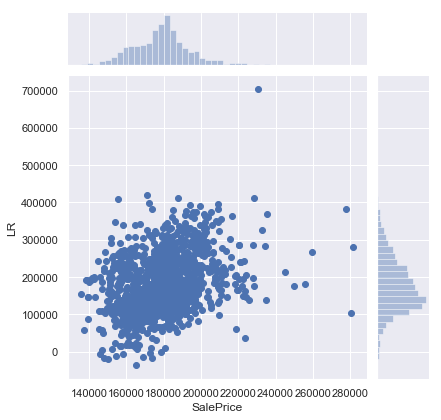

In [35]:
sns.jointplot(x="SalePrice", y="LR", data=FinTest);

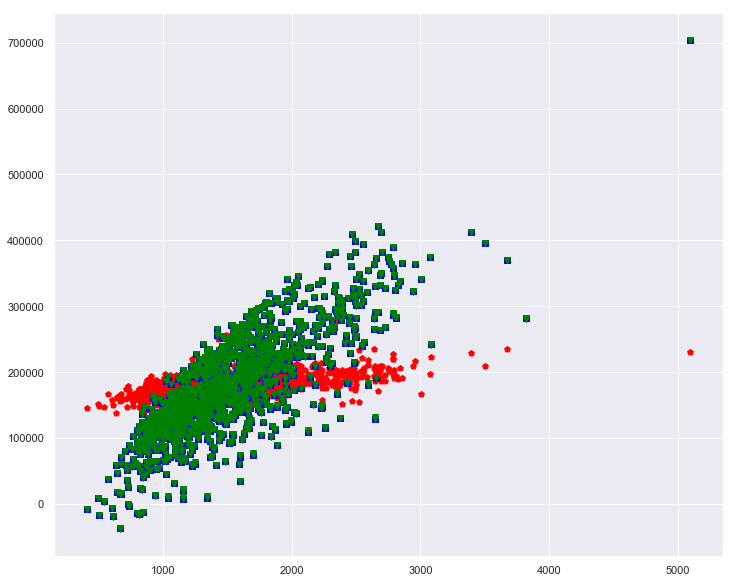

In [36]:
fig, ax = plt.subplots (figsize=(12,10))
plt.scatter (x=FinTest.GrLivArea, y=FinTest.SalePrice, c = "red", marker = "p", label = "Sample")
plt.scatter (x=FinTest.GrLivArea, y=FinTest.LR, c = "blue", marker = "s", label = "Linear")
plt.scatter (x=FinTest.GrLivArea, y=FinTest.R, c = "green", marker = "v", label = "Ridge")
plt.scatter (x=FinTest.GrLivArea, y=FinTest.LS, c = "green", marker = "v", label = "Lasso");

In [37]:
FinTest[FinTest['LR'] < 0]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Id,SalePrice,LR,R,LS
327,1788,30,RL,5400,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,2,5,1940,1950,Gable,CompShg,Stucco,Stucco,None,0.000,Fa,TA,PConc,Fa,TA,No,Unf,0.000,Unf,0.000,416.000,416.000,GasA,Gd,N,FuseA,599,0,0,599,1.000,0.000,1,0,2,1,Gd,4,Typ,0,0,0.000,0,0.000,0.000,0,0,N,0,81,0,0,0,0,0,6,2009,WD,Normal,1788,157929.595,-5705.738,-5827.498,-5704.020
354,1815,30,RM,5925,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,4,1940,1950,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,Gd,BrkTil,0,0,0,0,0.000,0,0.000,0.000,0.000,GasA,Fa,N,FuseA,612,0,0,612,0.000,0.000,1,0,1,1,TA,4,Typ,0,Detchd,1965.000,Unf,1.000,308.000,TA,Fa,N,0,0,25,0,0,0,0,10,2009,WD,Normal,1815,150106.505,-19124.062,-19560.074,-19125.344
362,1823,30,C (all),9392,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,3,1900,1950,Mansard,CompShg,AsbShng,AsbShng,None,0.000,TA,Fa,CBlock,Fa,TA,No,Unf,0.000,Unf,0.000,245.000,245.000,GasA,TA,N,SBrkr,797,0,0,797,0.000,0.000,1,0,2,1,TA,5,Typ,0,0,0.000,0,0.000,0.000,0,0,N,0,36,94,0,0,0,0,9,2009,WD,Abnorml,1823,169100.682,-14044.979,-14559.469,-14042.172
387,1848,20,RL,9000,Pave,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,TA,TA,Slab,0,0,0,0,0.000,0,0.000,0.000,0.000,GasA,Fa,N,SBrkr,660,0,0,660,0.000,0.000,1,0,2,1,Fa,5,Min2,0,0,0.000,0,0.000,0.000,0,0,N,0,0,100,0,0,0,0,6,2009,WD,Normal,1848,165014.533,-37248.457,-37666.510,-37244.833
455,1916,30,0,21780,Grvl,Reg,Lvl,0,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,Fa,Fa,CBlock,0,0,0,0,0.000,0,0.000,0.000,0.000,GasA,TA,N,FuseA,810,0,0,810,0.000,0.000,1,0,1,1,TA,4,Min1,0,Detchd,1975.000,Unf,1.000,280.000,TA,TA,N,119,24,0,0,0,0,0,3,2009,ConLD,Normal,1916,173575.505,-15878.430,-16429.315,-15880.573
638,2099,20,RM,7311,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1Story,2,5,1946,1950,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,Gd,BrkTil,TA,TA,No,Unf,0.000,Unf,0.000,407.000,407.000,GasA,TA,N,FuseA,407,0,0,407,0.000,0.000,1,0,1,1,TA,3,Typ,0,Detchd,1949.000,Unf,1.000,297.000,Fa,TA,Y,76,0,120,0,0,0,0,3,2008,WD,Abnorml,2099,145997.635,-7354.455,-7459.678,-7355.334
756,2217,20,0,14584,Pave,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.000,Fa,Po,Slab,0,0,0,0,0.000,0,0.000,0.000,0.000,Wall,Po,N,FuseA,733,0,0,733,0.000,0.000,1,0,2,1,Fa,4,0,0,Attchd,1952.000,Unf,2.000,487.000,Fa,Po,N,0,0,0,0,0,0,0,2,2008,WD,Abnorml,2217,172482.166,-2858.267,-3408.471,-2865.055
1118,2579,50,RM,11067,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,2,4,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,BrkTil,0,0,0,0,0.000,0,0.000,0.000,0.000,GasA,Ex,Y,SBrkr,640,0,205,845,0.000,0.000,1,0,1,1,TA,4,Maj2,0,Detchd,1950.000,Unf,1.000,256.000,TA,Fa,N,48,0,0,0,0,0,0,3,2007,WD,Normal,2579,154287.264,-13115.779,-13320.558,-13118.195
1411,2872,30,RL,8088,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,2,3,1922,1955,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,BrkTil,TA,TA,No,Unf,0.000,Unf,0.000,498.000,498.000,GasA,TA,N,FuseF,498,0,0,498,0.000,0.000,1,0,1,1,TA,3,Typ,0,Detchd,1922.000,Unf,1.

In [49]:
LinReg = LinearRegression().fit(X_train[Sfctr], y_train)
y_predict = LinReg.predict(X_train[Sfctr])

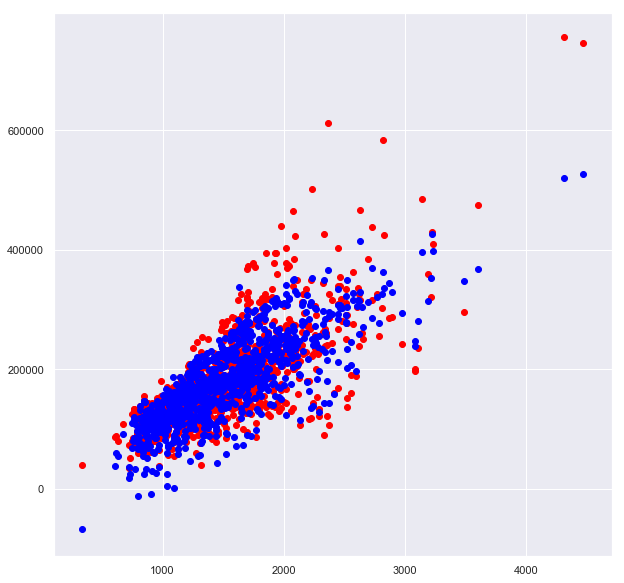

In [81]:
fig, ax = plt.subplots (figsize=(10, 10))
plt.scatter (x=X_train['GrLivArea'], y=y_train, c='red')
plt.scatter (x=X_train['GrLivArea'], y=y_predict, c='blue')
plt.show()